# Task 1 - Exploratory Data Analysis

This notebook will walk you through this task interactively, meaning that once you've imported this notebook into `Google Colab`, you'll be able to run individual cells of code independantly, and see the results as you go.

This notebooks is designed for users that have an understanding of Python and data analysis. There will be some helper functions and initial setup code provided, but it will be up to you to perform the analysis and to draw insights!

---

## Section 1 - Setup

First, we need to mount this notebook to our Google Drive folder, in order to access the CSV data file. If you haven't already, watch this video https://www.youtube.com/watch?v=woHxvbBLarQ to help you mount your Google Drive folder.

In [119]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In order to view, analyse and manipulate the dataset, we must load it into something called a `dataframe`, which is a way of storing tabulated data in a virtual table. This dataframe will allow us to analyse the data freely. To load it into a dataframe, we will need a package called `Pandas`. We can install pandas with this command:

In [120]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


And now we can import this package like so:

In [121]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

---

## Section 2 - Data loading

Now that Google Drive is mounted, you can store the CSV file anywhere in your Drive and update the `path` variable below to access it within this notebook. Once we've updated the `path`, let's read this CSV file into a pandas dataframe and see what it looks like

In [122]:
path = "/content/drive/MyDrive/Colab Notebooks/sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [123]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [125]:
df.columns

Index(['transaction_id', 'timestamp', 'product_id', 'category',
       'customer_type', 'unit_price', 'quantity', 'total', 'payment_type'],
      dtype='object')

In [126]:
df.shape

(7829, 9)

In [127]:
df.sample(10)

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
2645,44cabb6d-2bc3-442f-b32a-2ab6aa1f887d,2022-03-02 14:02:59,83c88e75-20c2-45b1-be9d-6cb808707dfb,spices and herbs,standard,4.19,4,16.76,cash
3583,e3751ad6-3e2b-45bb-aee4-df8bf2262c01,2022-03-07 09:47:45,3e417ee2-f68c-4042-9f0e-b89ff3f14f62,packaged foods,gold,7.19,4,28.76,cash
3369,a86d6a1f-8a28-46d9-b990-83eb6c2f1893,2022-03-04 10:38:15,edf4ac93-4e14-4a3d-8c60-e715210cf3f9,packaged foods,standard,6.99,3,20.97,e-wallet
2524,28cc1654-fd75-4b51-9083-26e34d5a2f7d,2022-03-03 18:35:16,a6aa5ff4-4eb0-473f-a4b4-0b0557134e29,frozen,standard,13.99,4,55.96,debit card
5610,da1bd61d-4be3-45ca-8534-2ed925965e93,2022-03-07 12:06:48,693ecb17-5479-474e-8ff9-c2f93de898c0,baked goods,basic,10.19,2,20.38,debit card
3176,393b428f-b56a-473e-970e-618e60656923,2022-03-07 10:19:59,e22d5756-f645-4305-bb23-6cbdf0104c36,packaged foods,standard,2.19,2,4.38,debit card
6002,8375a523-3d9d-4868-b3e0-a3a11f0e6eb8,2022-03-03 10:26:59,9cccbee3-9bee-45a0-9e46-23e3f4b446e8,baking,gold,2.49,4,9.96,e-wallet
3328,94984241-9f68-4144-af74-582ad21ccb28,2022-03-01 13:59:40,aa8a13dc-c4bf-4743-89fc-7cc6ebb02215,packaged foods,gold,3.49,4,13.96,e-wallet
2607,effe8adc-7b08-4c2d-8490-b490462c3987,2022-03-06 11:31:36,c8de27d0-2c44-4b5a-b178-59c45d054ccb,spices and herbs,premium,0.49,2,0.98,e-wallet
4425,3b0d9f9d-36fe-426f-ba78-29a8f87fd567,2022-03-03 14:52:40,088aa3ae-70f3-45af-8d63-15102b71bead,dairy,non-member,9.49,1,9.49,cash


Using the `.head()` method allows us to see the top 5 (5 by default) rows within the dataframe. We can use `.tail()` to see the bottom 5. If you want to see more than 5 rows, simply enter a number into the parentheses, e.g. `head(10)` or `tail(10)`.

---

## Section 3 - Descriptive statistics

In this section, you should try to gain a description of the data, that is: what columns are present, how many null values exist and what data types exists within each column.

To get you started an explanation of what the column names mean are provided below:

- transaction_id = this is a unique ID that is assigned to each transaction
- timestamp = this is the datetime at which the transaction was made
- product_id = this is an ID that is assigned to the product that was sold. Each product has a unique ID
- category = this is the category that the product is contained within
- customer_type = this is the type of customer that made the transaction
- unit_price = the price that 1 unit of this item sells for
- quantity = the number of units sold for this product within this transaction
- total = the total amount payable by the customer
- payment_type = the payment method used by the customer

After this, you should try to compute some descriptive statistics of the numerical columns within the dataset, such as:

- mean
- median
- count
- etc...

In [128]:
df.count()

transaction_id    7829
timestamp         7829
product_id        7829
category          7829
customer_type     7829
unit_price        7829
quantity          7829
total             7829
payment_type      7829
dtype: int64

In [129]:
print(df['total'].mean())
print(df['total'].median())
print(df['unit_price'].mean())
print(df['payment_type'].value_counts())

19.70990547962703
14.97
7.819480137948653
cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64


---

## Section 4 - Visualisation

Now that you've computed some descriptive statistics of the dataset, let's create some visualisations. You may use any package that you wish for visualisation, however, some helper functions have been provided that make use of the `seaborn` package. If you wish to use these helper functions, ensure to run the below cells that install and import `seaborn`.

In [130]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

To analyse the dataset, below are snippets of code that you can use as helper functions to visualise different columns within the dataset. They include:

- plot_continuous_distribution = this is to visualise the distribution of numeric columns
- get_unique_values = this is to show how many unique values are present within a column
- plot_categorical_distribution = this is to visualise the distribution of categorical columns
- correlation_plot = this is to plot the correlations between the numeric columns within the data

In [132]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)
  return value_counts

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

def correlation_plot(data: pd.DataFrame = None):
  corr = data.corr()
  _ = sns.heatmap(corr, cmap="YlGnBu", annot=True);
  

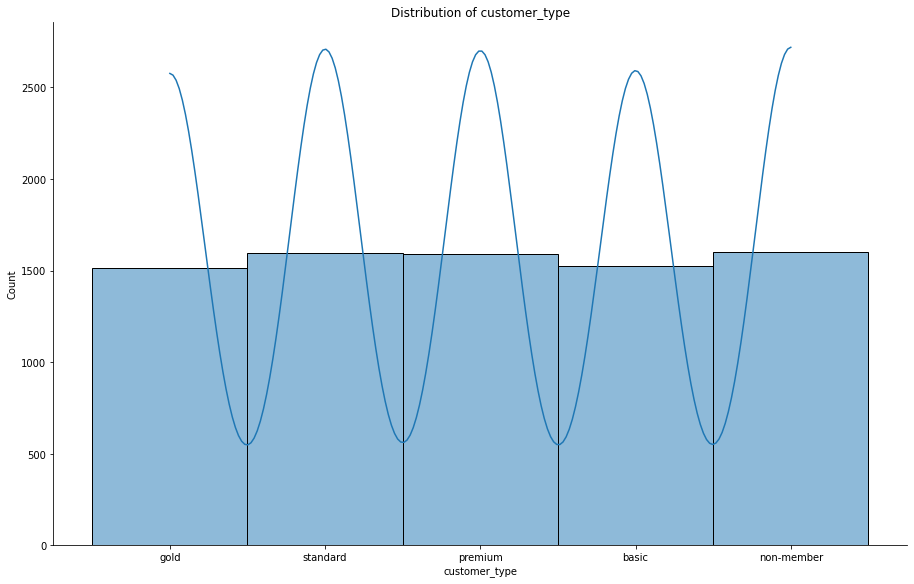

In [133]:
plot_continuous_distribution(df, 'customer_type')

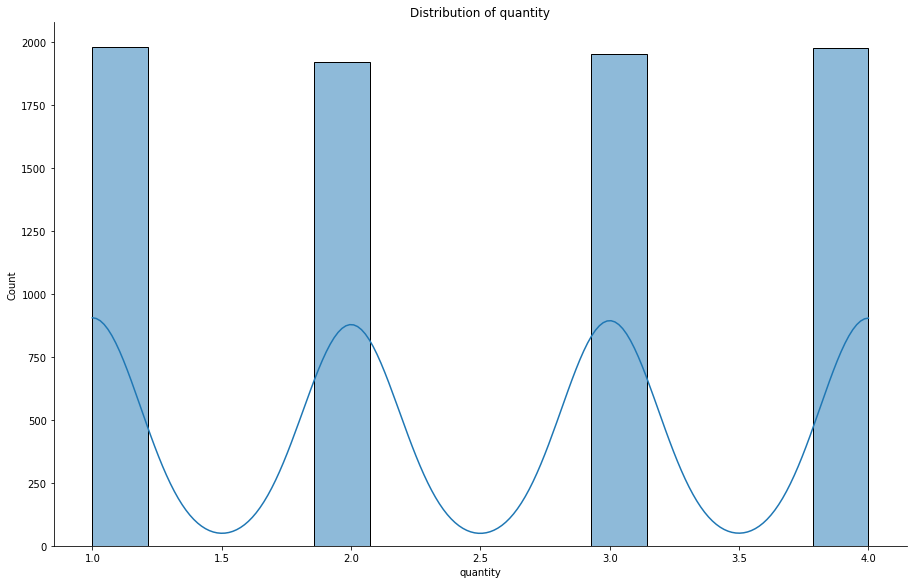

In [134]:
plot_continuous_distribution(df, 'quantity')

In [135]:
get_unique_values(df, 'payment_type')

Column: payment_type has 4 unique values

cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64


cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64

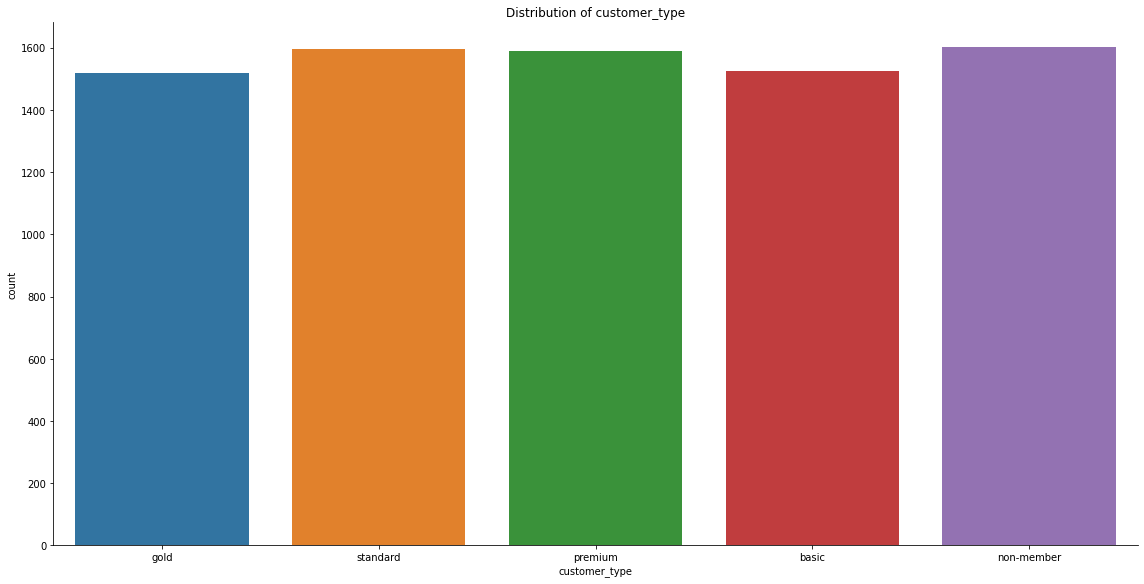

In [136]:
plot_categorical_distribution(df, 'customer_type')

   total  customer_type
0   7.98              0
1   3.99              1
2   0.38              2
3   0.76              0
4   8.98              3


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


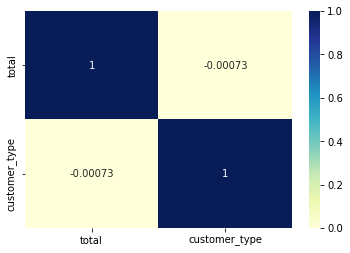

In [137]:
df_cp = df[['total', 'customer_type']]
df_cp['customer_type'].replace(np.array(df_cp['customer_type'].unique()), [0,1,2,3,4], inplace=True)
print(df_cp.head())
correlation_plot(df_cp)

                         transaction_id            timestamp  \
0  a1c82654-c52c-45b3-8ce8-4c2a1efe63ed  2022-03-02 09:51:38   
1  931ad550-09e8-4da6-beaa-8c9d17be9c60  2022-03-06 10:33:59   
2  ae133534-6f61-4cd6-b6b8-d1c1d8d90aea  2022-03-04 17:20:21   
3  157cebd9-aaf0-475d-8a11-7c8e0f5b76e4  2022-03-02 17:23:58   
4  a81a6cd3-5e0c-44a2-826c-aea43e46c514  2022-03-05 14:32:43   

                             product_id  category customer_type  unit_price  \
0  3bc6c1ea-0198-46de-9ffd-514ae3338713         0          gold        3.99   
1  ad81b46c-bf38-41cf-9b54-5fe7f5eba93e         0      standard        3.99   
2  7c55cbd4-f306-4c04-a030-628cbe7867c1         0       premium        0.19   
3  80da8348-1707-403f-8be7-9e6deeccc883         0          gold        0.19   
4  7f5e86e6-f06f-45f6-bf44-27b095c9ad1d         0         basic        4.49   

   quantity  total payment_type  
0         2   7.98     e-wallet  
1         1   3.99     e-wallet  
2         2   0.38     e-wallet  
3   

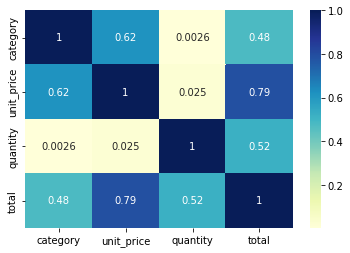

In [138]:
# df_cp = df[['category', 'customer_type', 'quantity']]
cust = np.array(df['customer_type'].unique())
df['customer_type'].replace(np.array(df_cp['customer_type'].unique()), np.arange(0, len(cust), dtype=int), inplace=True)
cat = np.array(df['category'].unique())
df['category'].replace(cat, np.arange(0, len(cat), dtype=int), inplace=True)
print(df.head())
correlation_plot(df)

In [139]:
print(df.columns)
df.drop(columns = ['transaction_id'], inplace=True)
print(df.head())

Index(['transaction_id', 'timestamp', 'product_id', 'category',
       'customer_type', 'unit_price', 'quantity', 'total', 'payment_type'],
      dtype='object')
             timestamp                            product_id  category  \
0  2022-03-02 09:51:38  3bc6c1ea-0198-46de-9ffd-514ae3338713         0   
1  2022-03-06 10:33:59  ad81b46c-bf38-41cf-9b54-5fe7f5eba93e         0   
2  2022-03-04 17:20:21  7c55cbd4-f306-4c04-a030-628cbe7867c1         0   
3  2022-03-02 17:23:58  80da8348-1707-403f-8be7-9e6deeccc883         0   
4  2022-03-05 14:32:43  7f5e86e6-f06f-45f6-bf44-27b095c9ad1d         0   

  customer_type  unit_price  quantity  total payment_type  
0          gold        3.99         2   7.98     e-wallet  
1      standard        3.99         1   3.99     e-wallet  
2       premium        0.19         2   0.38     e-wallet  
3          gold        0.19         4   0.76     e-wallet  
4         basic        4.49         2   8.98   debit card  


In [140]:
print(len(df.product_id.unique()))
product_ids = np.array(df.product_id.unique())
df['product_id'].replace(product_ids, np.arange(0, len(product_ids), dtype=int), inplace=True)
df.head()

300


,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,2022-03-02 09:51:38,0,0,gold,3.99,2,7.98,e-wallet
1,2022-03-06 10:33:59,1,0,standard,3.99,1,3.99,e-wallet
2,2022-03-04 17:20:21,2,0,premium,0.19,2,0.38,e-wallet
3,2022-03-02 17:23:58,3,0,gold,0.19,4,0.76,e-wallet
4,2022-03-05 14:32:43,4,0,basic,4.49,2,8.98,debit card


In [141]:
df.timestamp = pd.to_datetime(df.timestamp)
print(df.timestamp)
df['year'] = pd.DatetimeIndex(df.timestamp).year
df['month'] = pd.DatetimeIndex(df.timestamp).month
df['day'] = pd.DatetimeIndex(df.timestamp).day
df['week'] = pd.DatetimeIndex(df.timestamp).weekday
df['date'] = df.timestamp.dt.date
df.drop(columns=['timestamp'], inplace=True, errors='ignore')
print(df.head())

0      2022-03-02 09:51:38
1      2022-03-06 10:33:59
2      2022-03-04 17:20:21
3      2022-03-02 17:23:58
4      2022-03-05 14:32:43
               ...        
7824   2022-03-03 18:22:09
7825   2022-03-04 19:14:46
7826   2022-03-03 14:00:09
7827   2022-03-04 15:11:38
7828   2022-03-06 13:50:36
Name: timestamp, Length: 7829, dtype: datetime64[ns]
   product_id  category customer_type  unit_price  quantity  total  \
0           0         0          gold        3.99         2   7.98   
1           1         0      standard        3.99         1   3.99   
2           2         0       premium        0.19         2   0.38   
3           3         0          gold        0.19         4   0.76   
4           4         0         basic        4.49         2   8.98   

  payment_type  year  month  day  week        date  
0     e-wallet  2022      3    2     2  2022-03-02  
1     e-wallet  2022      3    6     6  2022-03-06  
2     e-wallet  2022      3    4     4  2022-03-04  
3     e-wallet  2

In [161]:
print(df[df.month == 3][['total']].sum())
print(df[df.month == 3][['total']].mean())
df_sale_month_wise = df.groupby('month')[['total']].mean()
print(df_sale_month_wise)
df_sale_month_customer_type_wise = df.groupby(['month', 'customer_type'])[['total']].sum()
print(df_sale_month_customer_type_wise)
df_sale_month_cat_wise = df.groupby(['month', 'category'])[['total']].sum()
print(df_sale_month_cat_wise)

total    154308.85
dtype: float64
total    19.709905
dtype: float64
           total
month           
3      19.709905
                        total
month customer_type          
3     basic          29569.16
      gold           29939.99
      non-member     31755.24
      premium        31655.68
      standard       31388.78
                   total
month category          
3     0          6124.21
      1          5070.46
      2          7436.45
      3          6590.10
      4           946.46
      5          6743.48
      6          6373.70
      7          3111.60
      8          9930.64
      9          7551.60
      10         6861.27
      11        14102.31
      12        10754.81
      13         8348.21
      14         3451.82
      15         1555.18
      16         6704.97
      17         4205.95
      18         4111.45
      19        10393.78
      20        14456.65
      21         9483.75


In [162]:
# product category day wise avg
df_sale_date_cat_wise = df.groupby(['date', 'category'])[['total']].mean()
print(df_sale_date_cat_wise)

                         total
date       category           
2022-03-01 0          6.405594
           1          5.610305
           2         16.314533
           3         23.564474
           4          6.397368
...                        ...
2022-03-07 17        20.588947
           18        24.316400
           19        45.659118
           20        38.640000
           21        30.022667

[154 rows x 1 columns]


In [164]:
# product id day wise avg
# group by which product sold how many units day wise and mean of them
df_sale_date_product_id_wise_mean = df.groupby(['date', 'product_id'])[['total']].mean()
print(df_sale_date_product_id_wise_mean)

                           total
date       product_id           
2022-03-01 0            9.044000
           1           11.685000
           2            0.496923
           3            0.402353
           4           13.878182
...                          ...
2022-03-07 294         22.475000
           295         44.970000
           296         13.490000
           298         33.980000
           299         36.894000

[1931 rows x 1 columns]


In [184]:
# take product_id in range wise all at a time will make mess in graph
df_sale_date_product_id_wise_total = df.groupby(['date', 'product_id'])[['total']].sum()
print(df_sale_date_product_id_wise_total)
# take some of the product_id
df_cp = df.copy()
# we can make every 10 product type into one graph for better display
prod_ids = np.array(df_cp['product_id'].unique())[:10]
df_cp['product_id'].replace(prod_ids, np.arange(0, len(prod_ids), dtype=int), inplace=True)
df_cp.drop(df_cp[df_cp['product_id'] > len(prod_ids)].index, inplace=True)
print(df_cp.head())
df_cp_sale_date_product_id_wise_total = df_cp.groupby(['date', 'product_id'])[['total']].sum()
print(df_cp_sale_date_product_id_wise_total)

                        total
date       product_id        
2022-03-01 0           135.66
           1           163.59
           2             6.46
           3             6.84
           4           152.66
...                       ...
2022-03-07 294          89.90
           295         134.91
           296          13.49
           298          67.96
           299         184.47

[1931 rows x 1 columns]
   product_id  category customer_type  unit_price  quantity  total  \
0           0         0          gold        3.99         2   7.98   
1           1         0      standard        3.99         1   3.99   
2           2         0       premium        0.19         2   0.38   
3           3         0          gold        0.19         4   0.76   
4           4         0         basic        4.49         2   8.98   

  payment_type  year  month  day  week        date  
0     e-wallet  2022      3    2     2  2022-03-02  
1     e-wallet  2022      3    6     6  2022-03-06  
2    

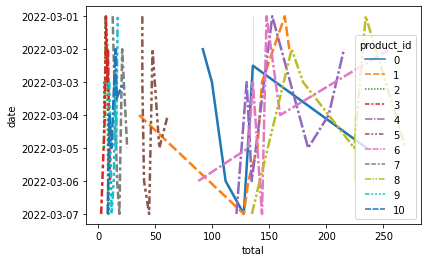

In [187]:
sns.lineplot(x="total", y="date",
             hue="product_id", style="product_id",
             data=df_cp_sale_date_product_id_wise_total, palette="tab10", linewidth=2.5)

Now it is your chance to visualise the columns, give it your best shot! As well as simply visualising the columns, try to interpret what the results mean in the context of the client.

---

## Section 5 - Summary

We have completed an initial exploratory data analysis on the sample of data provided. We should now have a solid understanding of the data. 

The client wants to know

```
"How to better stock the items that they sell"
```

From this dataset, it is impossible to answer that question. In order to make the next step on this project with the client, it is clear that:

- We need more rows of data. The current sample is only from 1 store and 1 week worth of data
- We need to frame the specific problem statement that we want to solve. The current business problem is too broad, we should narrow down the focus in order to deliver a valuable end product
- We need more features. Based on the problem statement that we move forward with, we need more columns (features) that may help us to understand the outcome that we're solving for

